<a href="https://colab.research.google.com/github/luongvantuit/learn-ai-with-python/blob/master/cnn/BT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.12.0

In [2]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import zipfile

file_zip = "/content/drive/My Drive/Machine Learning/CNN/cats_and_dogs_filtered.zip"

zip_ref = zipfile.ZipFile(file_zip, "r")
zip_ref.extractall("/tmp/cats_and_dogs")

zip_ref.close()

In [4]:
!ls -al /tmp/cats_and_dogs/

total 12
drwxr-xr-x 3 root root 4096 Nov  5 15:10 .
drwxrwxrwt 1 root root 4096 Nov  5 15:10 ..
drwxr-xr-x 4 root root 4096 Nov  5 15:10 cats_and_dogs_filtered


Contents of base directory:
['validation', 'vectorize.py', 'train']

Contents of train directory:
['dogs', 'cats']

Contents of validation directory:
['dogs', 'cats']
['cat.70.jpg', 'cat.754.jpg', 'cat.987.jpg', 'cat.353.jpg', 'cat.816.jpg', 'cat.335.jpg', 'cat.645.jpg', 'cat.662.jpg', 'cat.468.jpg', 'cat.706.jpg']
['dog.570.jpg', 'dog.730.jpg', 'dog.702.jpg', 'dog.298.jpg', 'dog.788.jpg', 'dog.382.jpg', 'dog.559.jpg', 'dog.363.jpg', 'dog.622.jpg', 'dog.139.jpg']
total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


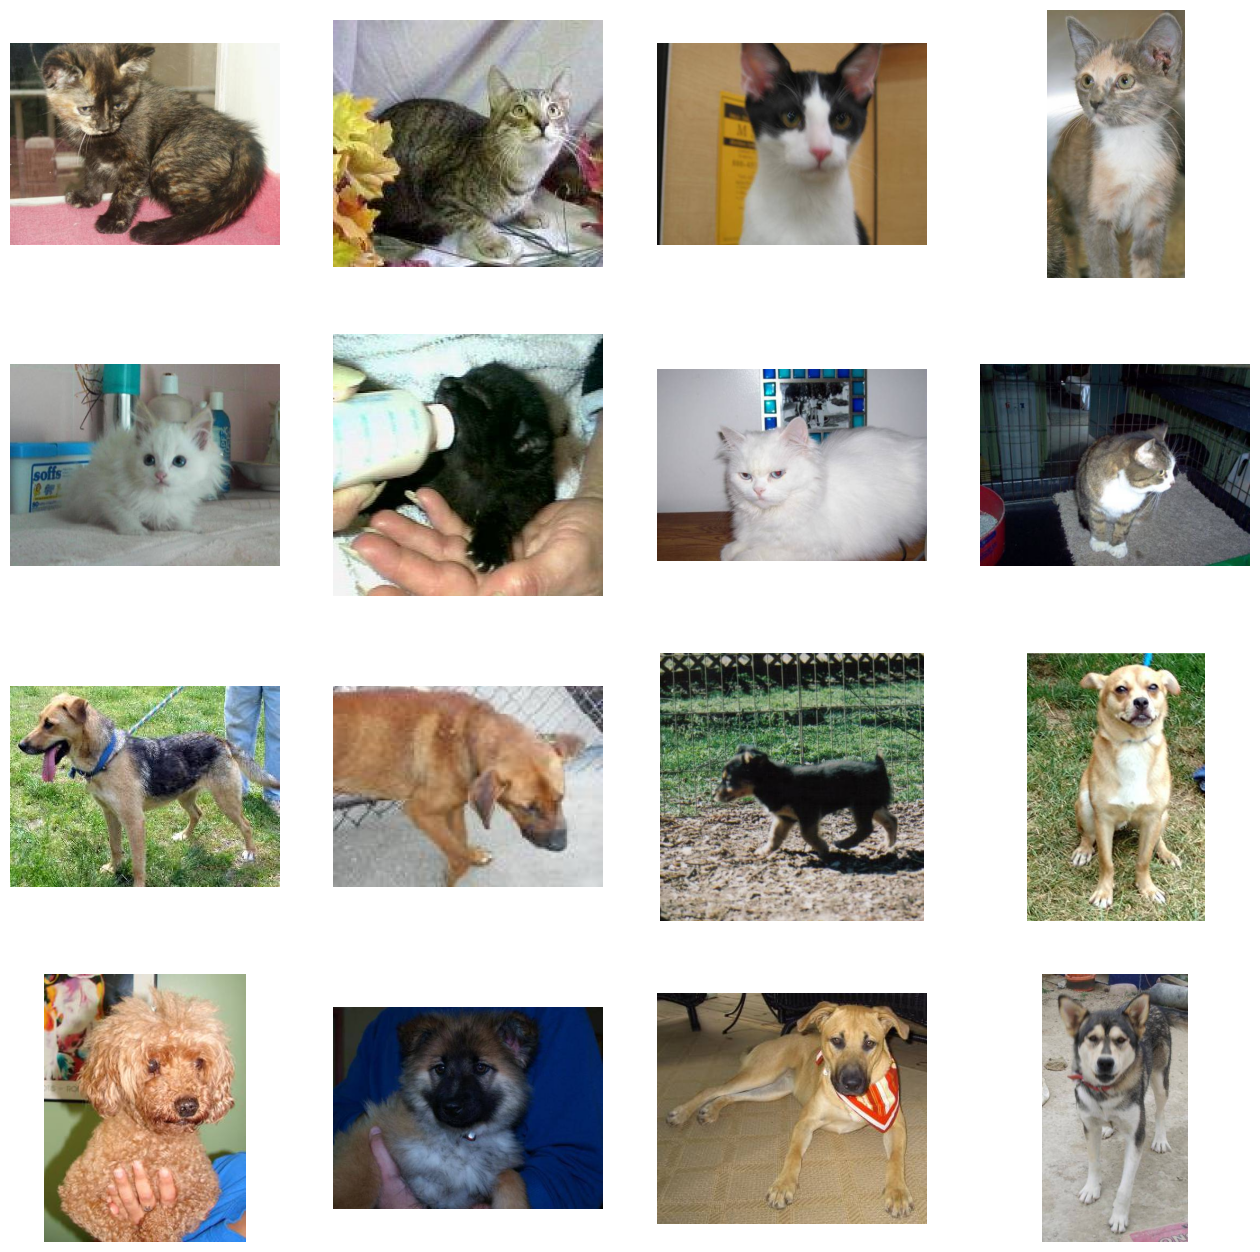

In [5]:
import os
from pathlib import Path

base_dir = Path("/tmp/cats_and_dogs/cats_and_dogs_filtered")
print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(base_dir/"train"))
print("\nContents of validation directory:")
print(os.listdir(base_dir/"validation"))

train_dir = base_dir/"train"
validation_dir = base_dir/"validation"

# Directory with training cat/dog pictures
train_cats_dir = train_dir/'cats'
train_dogs_dir = train_dir/'dogs'

# Directory with validation cat/dog pictures
validation_cats_dir = validation_dir/'cats'
validation_dogs_dir = validation_dir/'dogs'


train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])


print('total training cat images :', len(os.listdir( train_cats_dir ) ))
print('total training dog images :', len(os.listdir( train_dogs_dir ) ))
print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
pic_index = 0 # Index for iterating over images
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8
next_cat_pix = [os.path.join(train_cats_dir, fname)
            for fname in train_cat_fnames[ pic_index-8:pic_index]
]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
for fname in train_dog_fnames[ pic_index-8:pic_index]
]
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()



In [6]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  # Note the input shape is the desired size of the image 150x150 with 3 bytes color
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.5),
  # Flatten the results to feed into a DNN
  tf.keras.layers.Flatten(),
  # 512 neuron hidden layer
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  # Only 1 output neuron.
  # It will contain a value from 0-1 where 0 for 1 class ('cats')
  # and 1 for the other ('dogs')
  tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001),
  loss='binary_crossentropy',
  metrics = ['accuracy'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
  batch_size=20,
  class_mode='binary',
  target_size=(150, 150))
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator = test_datagen.flow_from_directory(validation_dir,
  batch_size=20,
  class_mode = 'binary',
  target_size = (150,
  150))

history = model.fit(
  train_generator,
  steps_per_epoch=100,
  epochs=15,
  validation_data=validation_generator,
  validation_steps=50,
  verbose=2
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/15
100/100 - 82s - loss: 0.9913 - accuracy: 0.5030 - val_loss: 0.6930 - val_accuracy: 0.5090 - 82s/epoch - 817ms/step
Epoch 2/15
100/100 - 72s - loss: 0.7000 - accuracy: 0.5270 - val_loss: 0.6795 - val_accuracy: 0.5180 - 72s/epoch - 724ms/step
Epoch 3/15
100/100 - 80s - loss: 0.6562 - accuracy: 0.6145 - val_loss: 0.6407 - val_accuracy: 0.6370 - 80s/epoch - 798ms/step
Epoch 4/15
100/100 - 76s - loss: 0.6162 - accuracy: 0.6570 - val_loss: 0.6215 - val_accuracy: 0.6550 - 76s/epoch - 760ms/step
Epoch 5/15
100/100 - 76s - loss: 0.5988 - accuracy: 0.6885 - val_loss: 0.6147 - val_accuracy: 0.6630 - 76s/epoch - 757ms/step
Epoch 6/15
100/100 - 76s - loss: 0.5685 - accuracy: 0.7125 - val_loss: 0.6019 - val_accuracy: 0.6630 - 76s/epoch - 758ms/step
Epoch 7/15
100/100 - 74s - loss: 0.5427 - accuracy: 0.7370 - val_loss: 0.5661 - val_accuracy: 0.7060 - 74s/epoch - 737ms/step
Epoch 8/15
100/100 - 104s - loss: 

In [7]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# 1. Chuẩn bị dữ liệu ảnh và chuyển ảnh thành vector
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)
target_size = (150, 150)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=target_size,
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Chuyển dữ liệu ảnh thành vector
def generator_to_data(generator):
    data = []
    labels = []
    for _ in range(len(generator)):
        images, label_batch = generator.next()
        # Reshape mỗi ảnh thành vector
        images = images.reshape(images.shape[0], -1)  # (batch_size, 150*150*3)
        data.append(images)
        labels.append(label_batch)
    # Ghép tất cả dữ liệu lại
    data = np.concatenate(data)
    labels = np.concatenate(labels)
    return data, labels

X_train, y_train = generator_to_data(train_generator)
X_val, y_val = generator_to_data(validation_generator)

# 2. Xây dựng và huấn luyện mô hình Hồi quy Logistic
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# 3. Dự đoán và đánh giá
y_pred = logistic_model.predict(X_val)

# Tính độ chính xác và các độ đo khác
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_val, y_pred))


Found 1500 images belonging to 2 classes.
Found 250 images belonging to 2 classes.
Accuracy: 55.20%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.54      0.63      0.59       125
         1.0       0.56      0.47      0.51       125

    accuracy                           0.55       250
   macro avg       0.55      0.55      0.55       250
weighted avg       0.55      0.55      0.55       250



In [11]:
import numpy as np
import tensorflow as tf
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, accuracy_score

# 1. Chuẩn bị dữ liệu ảnh và chuyển ảnh thành vector
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)
target_size = (150, 150)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=target_size,
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Chuyển dữ liệu ảnh thành vector
def generator_to_data(generator):
    data = []
    labels = []
    for _ in range(len(generator)):
        images, label_batch = generator.next()
        # Reshape mỗi ảnh thành vector
        images = images.reshape(images.shape[0], -1)  # (batch_size, 150*150*3)
        data.append(images)
        labels.append(label_batch)
    # Ghép tất cả dữ liệu lại
    data = np.concatenate(data)
    labels = np.concatenate(labels)
    return data, labels

X_train, y_train = generator_to_data(train_generator)
X_val, y_val = generator_to_data(validation_generator)

n_components = 225

pca = PCA(n_components=n_components)
X_train = pca.fit_transform(X_train)
X_val = pca.fit_transform(X_val)

print(X_train.shape)
print(X_val.shape)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_shape=(225,), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

test_loss, test_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Độ chính xác trên tập kiểm tra: {test_accuracy:.4f}")


Found 1500 images belonging to 2 classes.
Found 250 images belonging to 2 classes.
(1500, 225)
(250, 225)
Epoch 1/15
47/47 [==============================] - 2s 9ms/step - loss: 2.2412 - accuracy: 0.5020 - val_loss: 0.8131 - val_accuracy: 0.5040
Epoch 2/15
47/47 [==============================] - 0s 5ms/step - loss: 1.3069 - accuracy: 0.5007 - val_loss: 0.6941 - val_accuracy: 0.5400
Epoch 3/15
47/47 [==============================] - 0s 5ms/step - loss: 1.0160 - accuracy: 0.4987 - val_loss: 0.6889 - val_accuracy: 0.5560
Epoch 4/15
47/47 [==============================] - 0s 5ms/step - loss: 0.8918 - accuracy: 0.5133 - val_loss: 0.6938 - val_accuracy: 0.5120
Epoch 5/15
47/47 [==============================] - 0s 5ms/step - loss: 0.7964 - accuracy: 0.5253 - val_loss: 0.6963 - val_accuracy: 0.5040
Epoch 6/15
47/47 [==============================] - 0s 5ms/step - loss: 0.7911 - accuracy: 0.5240 - val_loss: 0.6963 - val_accuracy: 0.5000
Epoch 7/15
47/47 [==============================] - 0s